# Applying Wavelets Index

$$WaWI =\frac{(log(A_{b5}) - log(A_{b3}))}{(log(A_{b5}) + log(A_{b3}))}$$

In [1]:
import pywt
import numpy as np

def wawi(sr5, sr3):
    '''
    Receives the b3 and b5 SR corrected bands
    and returns the WaWI index
    '''
    
    # Wavelet decomposition (2 level)
    n = 1
    w = 'db1'
    b5_coeffs = pywt.wavedec2(sr5,wavelet=w,level=n)
    Ab5 = b5_coeffs[0] #Get the approximation channel
    b3_coeffs = pywt.wavedec2(sr3,wavelet=w,level=n)
    Ab3 = b3_coeffs[0] #Get the approximation channel
    
    # Index equation
    index = (np.log10(Ab5) - np.log10(Ab3))/(np.log10(Ab5) + np.log10(Ab3))
    
    return index, Ab5, Ab3


def NDMI(sr5,sr3):
    ndmi_index = (sr5-sr3)/(sr5+sr3)
    return ndmi_index
       

# Performance Evaluation

We'll use the SSIM index, the correlation coefficient (pearson r) and the Jaccard's similarity coefficient to compare our custom index (WaWI) to base indexes like NDMI, MNDMI and K-means.


In [2]:
import numpy as np
from sklearn.metrics import jaccard_score
from skimage.metrics import structural_similarity as ssim
from scipy.stats import pearsonr

def compare(index1, index2):
    # Correlation coeficcient (r)
    r = pearsonr(index1,index2)[0]
    
    # SSIM
    ssim_index = ssim(index1, index2, data_range = _)
    
    #Jaccard index
    jaccard = jaccard_score(index1, index2)
    
    return r, ssim_index, jaccard
    

## Aplicando nas nossas imagens

In [3]:
from osgeo import gdal
import matplotlib.pyplot as plt

In [4]:
b5_file = 'b5.tif'
b3_file = 'b3.tif'
b3 = gdal.Open(b3_file, gdal.GA_ReadOnly)
b5 = gdal.Open(b5_file, gdal.GA_ReadOnly)

sr3 = b3.GetRasterBand(1).ReadAsArray()
sr5 = b5.GetRasterBand(1).ReadAsArray()
#sr5 = np.nan_to_num(sr5)
#sr3 = np.nan_to_num(sr3)

wawi_index, Ab5, Ab3 = wawi(sr5,sr3)
ndmi_index = NDMI(sr5,sr3)
#wawi_index = np.nan_to_num(wawi_index)

<ipython-input-1-17dd062ca005>:19: RuntimeWarning: divide by zero encountered in log10
  index = (np.log10(Ab5) - np.log10(Ab3))/(np.log10(Ab5) + np.log10(Ab3))
<ipython-input-1-17dd062ca005>:19: RuntimeWarning: invalid value encountered in subtract
  index = (np.log10(Ab5) - np.log10(Ab3))/(np.log10(Ab5) + np.log10(Ab3))
<ipython-input-1-17dd062ca005>:19: RuntimeWarning: invalid value encountered in true_divide
  index = (np.log10(Ab5) - np.log10(Ab3))/(np.log10(Ab5) + np.log10(Ab3))
<ipython-input-1-17dd062ca005>:25: RuntimeWarning: invalid value encountered in true_divide
  ndmi_index = (sr5-sr3)/(sr5+sr3)


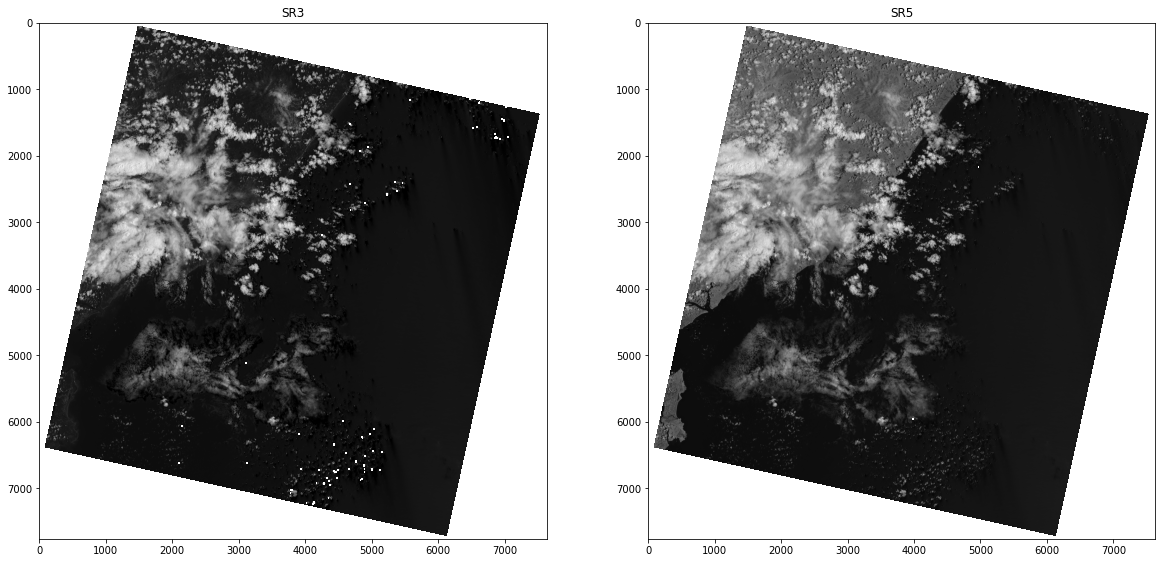

In [13]:
plt.figure(figsize = (20,20))

plt.subplot(1, 2, 1)
plt.title("SR3")
plt.imshow(sr3, cmap="gray")


plt.subplot(1, 2, 2)
plt.title("SR5")
plt.imshow(sr5, cmap="gray")

#plt.colorbar()

plt.show()

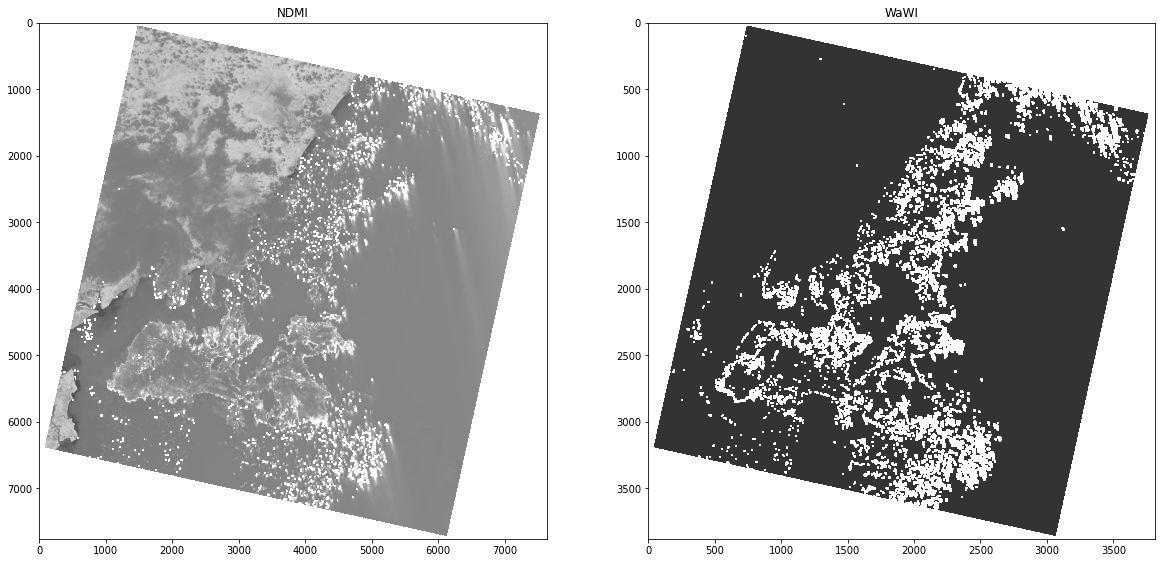

In [12]:
plt.figure(figsize = (20,20))

plt.subplot(1, 2, 1)
plt.title("NDMI")
plt.imshow(ndmi_index, cmap="gray")


plt.subplot(1, 2, 2)
plt.title("WaWI")
plt.imshow(wawi_index, cmap="gray")

#plt.colorbar()

plt.show()

**Ta dando erro pq eu não dei upsampling na imagem wawi_index**

In [113]:
compare(wawi_index, ndmi_index)

ValueError: Input images must have the same dimensions.